# Final project

Welcome to the final project of the Pandas course/module.
In this project, you must answer a set of questions posed to two sets of data:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

These public datasets have been published on Kaggle. More instructions on each of them can be found at the links above. You will also find them in the `Datasets` folder within our handouts.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Questions - Obesity among adults by country, 1975-2016

In [21]:
df_obesity = pd.read_csv("C:/Users/victo/OneDrive/Documentos/GitHub/GPD_Analysis/analise-de-obesidade-e-pib-per-capita/Datasets/obesity_cleaned.csv")
df_obesity = df_obesity[['Country','Year','Obesity (%)','Sex']] #Aqui eu poderia usar o método .drop() e passar o nome da coluna dentro do parâmetro
# Poderia também usar o método del porém o método del só permite remover uma coluna (PERMANENTEMENTE)
# Resumo: DROP permite remover mais de uma coluna e permite determinar se vai ser permanente ou não usando INPLACE / DEL remove uma coluna de forma permanente
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  int64 
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: int64(1), object(3)
memory usage: 767.9+ KB


In [22]:
display(df_obesity)

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


- Clear the data from the DataFrame, creating a column called 'Obesity' which will contain the obesity values. Turn any columns that were imported as strings into floats.

In [23]:
df_obesity['Obesity'] = pd.to_numeric(df_obesity['Obesity (%)'].str.strip().str[:3], errors='coerce')
#str.strip() = Remove espaço em branco
#errors='coerce' = Converte valores inválidos para NaN
del df_obesity['Obesity (%)']
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  24570 non-null  object 
 1   Year     24570 non-null  int64  
 2   Sex      24570 non-null  object 
 3   Obesity  24066 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 767.9+ KB


- What was the average percentage of obesity by sex in the world in 2015?

In [24]:
df_obesity_2015 = df_obesity[df_obesity['Year'] == 2015]
df_obesity_gender = df_obesity_2015.groupby('Sex')['Obesity'].mean()
#Apesar de estar correto, poderia ser feito tudo em uma única linha passando primeiramente o filtro (df_obesity[df_obesity['Year'] == 2015]) e depois agrupando por sexo e gerando a média (groupby('Sex')['Obesity'].mean())
#O código final ficaria assim: df_obesity[df_obesity['Year'] == 2015].groupby('Sex')['Obesity'].mean()
df_obesity_gender

Sex
Both sexes    19.185864
Female        22.518848
Male          15.674346
Name: Obesity, dtype: float64

- Which are the 5 countries with the highest and lowest rate of increase in obesity rates over the observed period?

In [25]:
display(df_obesity)

,Country,Year,Sex,Obesity
0,Afghanistan,1975,Both sexes,0.5
1,Afghanistan,1975,Male,0.2
2,Afghanistan,1975,Female,0.8
3,Afghanistan,1976,Both sexes,0.5
4,Afghanistan,1976,Male,0.2
...,...,...,...,...
24565,Zimbabwe,2015,Male,4.5
24566,Zimbabwe,2015,Female,24.0
24567,Zimbabwe,2016,Both sexes,15.0
24568,Zimbabwe,2016,Male,4.7


In [26]:
df_obesity_start = df_obesity[df_obesity['Year']== 1975] #Criando dataframe com resultados de 1975
df_obesity_start.set_index('Country',inplace=True) #Definindo como index do dataframe a coluna 'Country'

df_obesity_end = df_obesity[df_obesity['Year']== 2016] #Criando dataframe com resultados de 2016
df_obesity_end.set_index('Country',inplace=True) #Definindo como index do dataframe a coluna 'Country'

df_obesity_ev = df_obesity_end[df_obesity_end['Sex'] == 'Both sexes']['Obesity'] - df_obesity_start[df_obesity_start['Sex'] == 'Both sexes']['Obesity'] # Como o resultado já está em percentual o cálculo foi realizado para entender a evolução em pontos percentuais

In [27]:
# top 5 países com menor evolução
df_obesity_ev.sort_values().dropna().head(5)

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [28]:
# top 5 países com maio evolução
df_obesity_ev.sort_values().dropna().tail(5)

Country
Micronesia (Federated States of)    27.0
Tonga                               29.0
Kiribati                            31.0
Niue                                32.0
Tuvalu                              34.0
Name: Obesity, dtype: float64

- Which countries had the highest and lowest levels of obesity in 2015?

In [29]:
df_obesity_2015[df_obesity_2015['Obesity']==df_obesity_2015['Obesity'].max()]

,Country,Year,Sex,Obesity
15116,Nauru,2015,Female,63.0


In [30]:
df_obesity_2015[df_obesity_2015['Obesity']==df_obesity_2015['Obesity'].min()]

,Country,Year,Sex,Obesity
24187,Viet Nam,2015,Male,1.5


- What is the average percentage difference in obesity between the sexes over the years in Brazil?

In [31]:
df_Brasil = df_obesity[df_obesity['Country']== "Brazil"]


In [32]:
df_Brasil[df_Brasil['Sex']=='Female']['Obesity'] - df_Brasil[df_Brasil['Sex']=='Male']['Obesity']

2899   NaN
2900   NaN
2902   NaN
2903   NaN
2905   NaN
        ..
3017   NaN
3019   NaN
3020   NaN
3022   NaN
3023   NaN
Name: Obesity, Length: 84, dtype: float64

- Could you plot a graph showing the evolution of obesity for both sexes in the world?

## Questions - GDP Per Person (1901-2011)

In [33]:
df_gdp = pd.read_csv("C:/Users/victo/OneDrive/Documentos/GitHub/GPD_Analysis/analise-de-obesidade-e-pib-per-capita/Datasets/GDP.csv", decimal=".")
display(df_gdp)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Clean up the dataset, converting strings into dates or floats where necessary.

In [34]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: int(x.split("/")[-1]))

In [35]:
df_gdp= df_gdp.rename(columns={' GDP_pp ': "GDP_pp"})
df_gdp['GDP_pp'] = df_gdp['GDP_pp'].str.replace(',','').str.strip()
#str.replace(',',''): leitura de float (xxxx.xx)> Como a Serie tinha valores onde a casa decimal estava sendo representada por "," foi necessário utilizar o método >>str.replace(',','')<< para remover
#str.strip(): Alguns valores dentro da Serie possuia espaço no início/fim (Ex: " 10 ") então foi utilizado o método >>str.strip()<< para remover
df_gdp['GDP_pp'] = df_gdp['GDP_pp'].astype(float) #<< Convertendo a Serie de STRING para FLOAT



In [36]:
print(df_gdp.dtypes)

Country     object
Region      object
Year         int64
GDP_pp     float64
dtype: object


- Can you tell me the first value recorded for each country?

In [37]:
df_gdp_min = df_gdp.groupby('Country').first().reset_index()
df_gdp_min

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Albania,Europe,1901,1062.01
2,Algeria,"Middle East, North Africa, and Greater Arabia",1901,1807.76
3,Andorra,Europe,1901,3352.50
4,Angola,Sub-Saharan Africa,1901,525.76
...,...,...,...,...
188,Venezuela,South America,1901,766.21
189,Vietnam,Asia,1901,572.96
190,"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1901,729.39
191,Zambia,Sub-Saharan Africa,1901,532.38


- Name the regions with the highest growth in GDP per capita in the last century.

In [38]:
#verificando a menor e maior data 
df_gdp[df_gdp['Year']<2000].min()
df_gdp[df_gdp['Year']<2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
GDP_pp               118681.3
dtype: object

In [39]:
#verificando a menor e maior data em Kosovo  
df_gdp[(df_gdp['Country'] == 'Kosovo')&(df_gdp['Year']<2000)].min()
df_gdp[(df_gdp['Country'] == 'Kosovo')&(df_gdp['Year']<2000)].min()

Country     Kosovo
Region      Europe
Year          1991
GDP_pp     2875.45
dtype: object

In [40]:
#Criando dataframe com o registro inicial
df_gdp_start = df_gdp[df_gdp['Year'] == 1901]
df_gdp_kosovo_start = df_gdp[(df_gdp['Country'] == 'Kosovo') & (df_gdp['Year']== 1991)] #O registro mais recente do País Kozovo aconteceu em 1991, por isso criei um dataframe específico pra ele

df_gdp_start1 = pd.concat([df_gdp_start,df_gdp_kosovo_start], ignore_index=True) #Concatenando ambos os dataframes para ter os registros iniciais corretos de todos os países

df_gdp_end = df_gdp[df_gdp['Year'] == 1996]




In [41]:
df_region_growth = (((df_gdp_end.groupby('Region')['GDP_pp'].mean() - df_gdp_start1.groupby('Region')['GDP_pp'].mean()) / df_gdp_start1.groupby('Region')['GDP_pp'].mean())*100).sort_values(ascending= False)



df_region_growth

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
North America                                    589.760175
Europe                                           578.022157
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: GDP_pp, dtype: float64

- Fill in the missing years in each country with an estimate, based on the difference between the next record and the previous one.

In [42]:
array_year = np.arange(df_gdp['Year'].min(),df_gdp['Year'].max()) #Definindo um array com todos os anos entre a primeira e última data existente
df_all_years = pd.DataFrame(array_year, columns=['Year']) #Transformando o array em um dataframe
df_all_years.index = df_all_years['Year'] #Transformando a coluna 'Year' em index

df_years_off = ~df_all_years['Year'].isin(df_gdp['Year']) 
#Comparando os valores do dataframe de ano com o dataframe principal para identificar os anos existentes
#Inicialmente o método isin() retorna como VERDADEIRO os valores comparados, porém foi adicionado o "~" no início do código para inverter o resultado
#A inversão é necessária pois utilizaremos apenas os anos que não estão no dataframe principal
df_years_off = df_years_off.loc[df_years_off].index


In [43]:
df_gdp = df_gdp.sort_values(['Country','Year'])
df_gdp['delta_gdp'] = df_gdp['GDP_pp'] - df_gdp['GDP_pp'].shift(1)
df_gdp['delta_year'] = df_gdp['Year'] - df_gdp['Year'].shift(1)
df_gdp['average_gdp'] = (df_gdp['delta_gdp'] / df_gdp['delta_year']).shift(-1)

In [44]:
df_gdp['next_year'] = df_gdp['Year'].shift(-1)
del df_gdp['delta_gdp'], df_gdp['delta_year']

In [45]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row['Year']== 2011:
        continue

    years_to_add = df_years_off[(df_years_off < row['next_year']) & (df_years_off > row['Year'])] #vai gerar uma linha com os anos faltando para cada linha existente no dataframe original

    for new_year in years_to_add:
        add_rows = row.copy() #copiando o valor para a variável para não alterar o valor original
        add_rows['GDP_pp'] = (new_year - add_rows['Year']) * add_rows['average_gdp'] + add_rows['GDP_pp']
        add_rows['Year'] = new_year
        add_rows['Kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_rows.to_frame().transpose()])

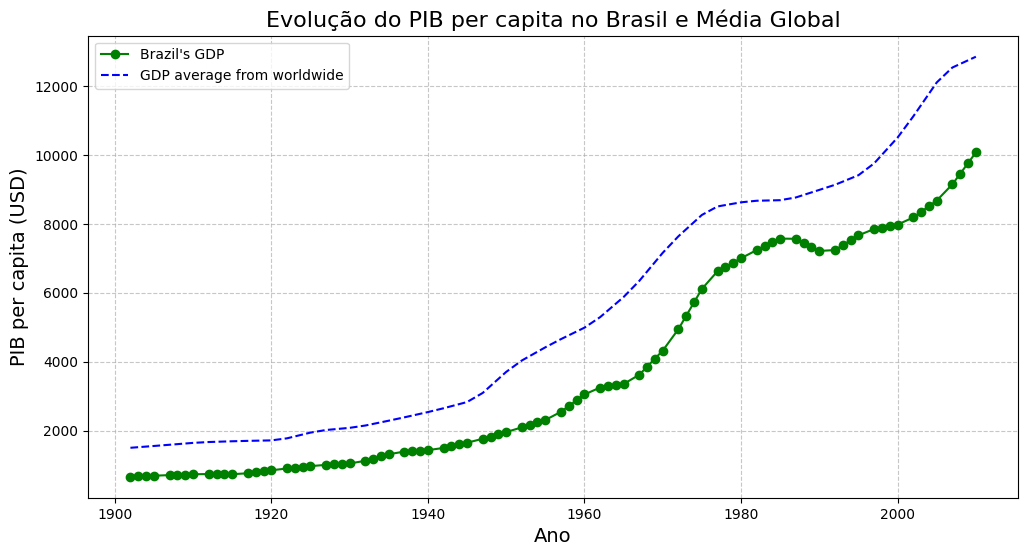

In [51]:
#Datasets that will be used to create graph
df_grouped = df_new_data.groupby('Year')['GDP_pp'].mean().reset_index()
df_gdp_brasil = df_new_data[df_new_data['Country']== 'Brazil']

# Creating graph
plt.figure(figsize=(12, 6))

#Brazil's axis X line
plt.plot(df_gdp_brasil['Year'], df_gdp_brasil['GDP_pp'], color='green', marker='o', label="Brazil's GDP")

#Worldwide second axis X line
plt.plot(df_grouped['Year'], df_grouped['GDP_pp'], color='blue', linestyle='--', label='GDP average from worldwide')

# Custom setup for graph
plt.title('Evolução do PIB per capita no Brasil e Média Global', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('PIB per capita (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

### CHALLENGES
- Could you create a map of GDp or obesity in the world over the years?

- Is there a relationship between obesity levels and GDP per capita?
